# Image pre-processing techniques

## 1) Basic representation of an image using a 2D matrix

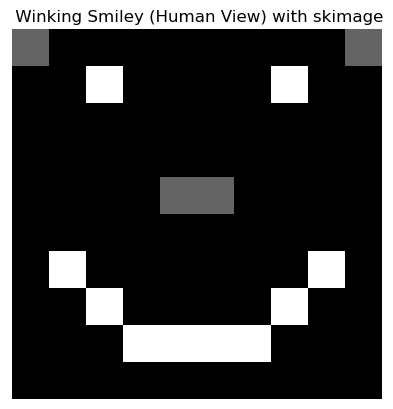

 Pixel Values (How Computer Sees It):

[[100   0   0   0   0   0   0   0   0 100]
 [  0   0 255   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100 100   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0 255   0]
 [  0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import gray2rgb

# 0 = black (background),in between numbers are different shades of gray , 255 = white (smiley)
pixel_values = [
    [100, 0, 0, 0, 0, 0, 0, 0, 0, 100],
    [0, 0, 255, 0, 0, 0, 0, 255, 0, 0],   
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],     
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       
    [0, 0, 0, 0, 100, 100, 0, 0, 0, 0],      
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],       
    [0, 255, 0, 0, 0, 0, 0, 0, 255, 0],  
    [0, 0, 255, 0, 0, 0, 0, 255, 0, 0],  
    [0, 0, 0, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

# Convert to numpy array with uint8
image_array = np.array(pixel_values, dtype=np.uint8)

# Display with skimage and matplotlib
plt.imshow(image_array, cmap='gray')
plt.title(" Winking Smiley (Human View) with skimage")
plt.axis('off')
plt.show()

# Print pixel values (how computer sees it)
print(" Pixel Values (How Computer Sees It):\n")
print(image_array)

# How '.imshow' works ?

# Validates the input: Checks if img is a valid 2D or 3D NumPy array.

# Normalizes the data: Scales or transforms data values to a standard range if needed (e.g., 0–1 or 0–255).

# Maps data to colors:

# If the input is 2D → uses a colormap (e.g., grayscale, viridis).

# If 3D (e.g., RGB) → assumes direct color input.

# Converts the array into an image object using AxesImage.

# Adds the image to the current Axes.

# Schedules a render (won’t actually render until you call plt.show()) -> It renders using some default engine from backend


## 2) Convert an image to grayscale and  HSV format

🟦 RGB Image Shape: (512, 512, 3)
⬛ Grayscale Image Shape: (512, 512)
🎨 HSV Image Shape: (512, 512, 3)


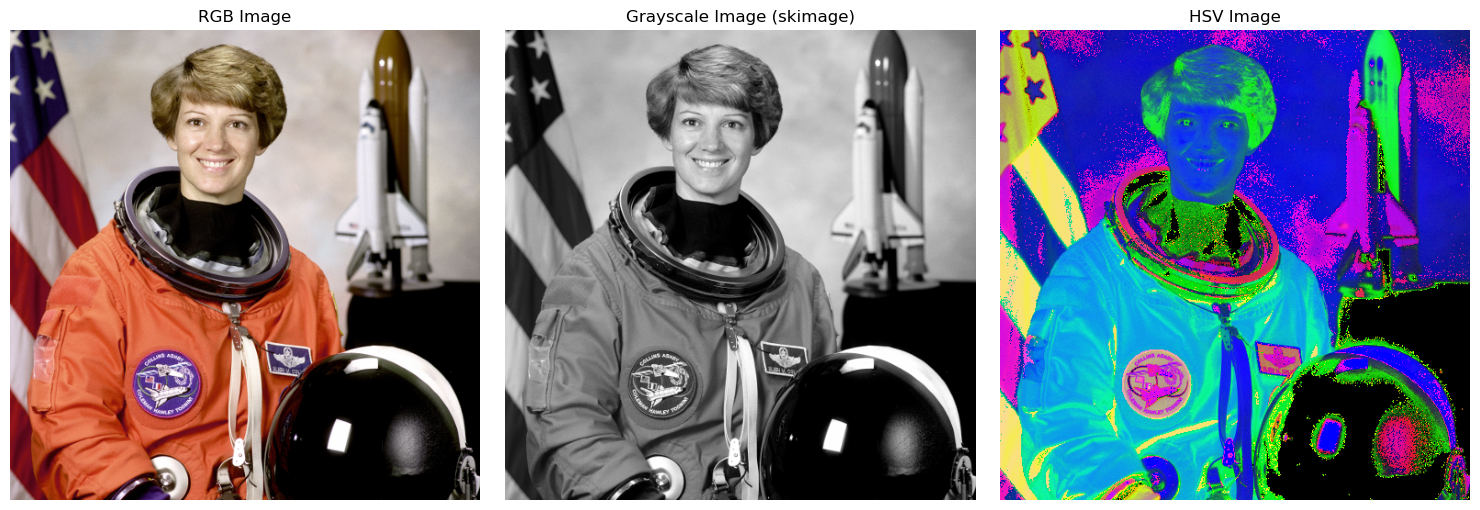

In [2]:
# STEP 1: Import libraries
from skimage import color, data
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: Load a built-in image from skimage
img_rgb = data.astronaut() 

# STEP 3: Convert to grayscale and HSV using skimage
img_gray = color.rgb2gray(img_rgb)
img_hsv = color.rgb2hsv(img_rgb)

# STEP 4: Show the shapes
print("🟦 RGB Image Shape:", img_rgb.shape)       # (H, W, 3)
print("⬛ Grayscale Image Shape:", img_gray.shape) # (H, W)
print("🎨 HSV Image Shape:", img_hsv.shape)       # (H, W, 3)

# STEP 5: Display all using subplot
plt.figure(figsize=(15, 5))

# RGB
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis('off')

# Grayscale
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image (skimage)")
plt.axis('off')

# HSV
plt.subplot(1, 3, 3)
plt.imshow(img_hsv)
plt.title("HSV Image")
plt.axis('off')

plt.tight_layout()
plt.show()


## 03) Image  resizing

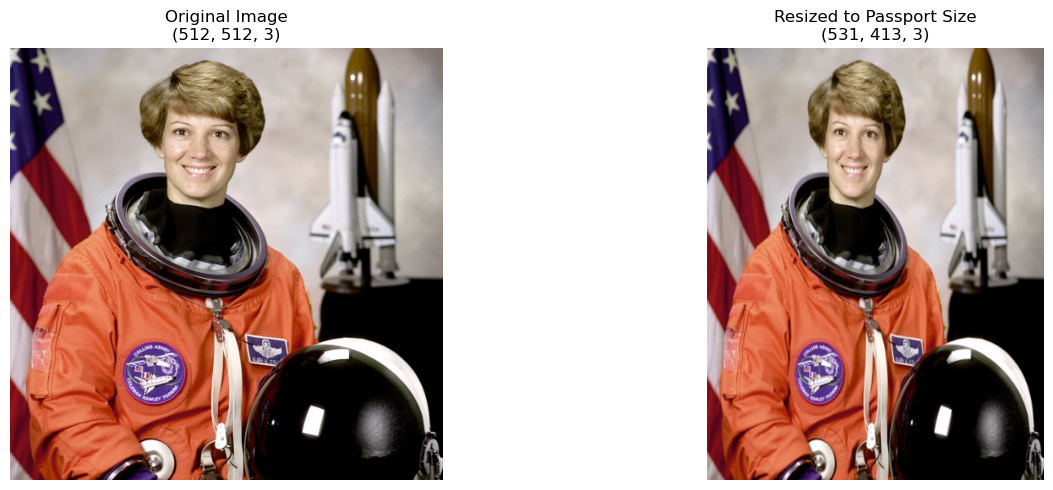

In [3]:
import matplotlib.pyplot as plt
from skimage import io, transform, data
import warnings
warnings.filterwarnings('ignore')

# Load the built-in astronaut image (RGB)
image = data.astronaut()

# Resize to standard passport size: 531 x 413 pixels
passport_size = transform.resize(image, (531, 413), anti_aliasing=True)

# Show original and resized images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)  # Use plt.imshow, not io.imshow here
plt.title("Original Image\n" + f"{image.shape}")
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(passport_size)  # Correct function
plt.title("Resized to Passport Size\n" + f"{passport_size.shape}")
plt.axis('off')

plt.tight_layout()
plt.show()


## 04) Image rescaling

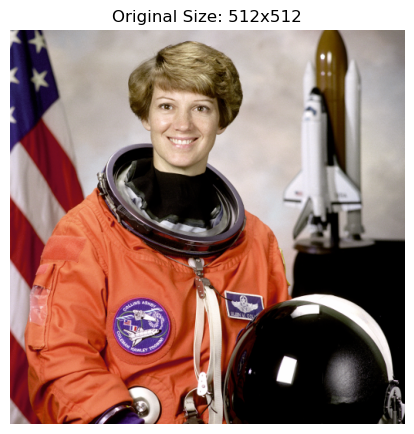

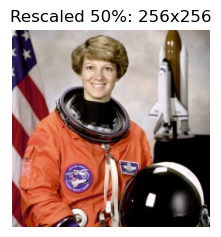

In [4]:
import matplotlib.pyplot as plt
from skimage import transform, data 
import warnings
warnings.filterwarnings('ignore')

# Load image
image = data.astronaut()

# Rescale the image to 50%
# channel_axis = -1 tells skimage that the color channels (RGB) are on the last axis of the array (which is standard for images).
rescaled_image = transform.rescale(image, 0.5, channel_axis=-1)


# Function to display an image at its actual pixel size
def show_actual_size(img, title):
    dpi = 100 #Dots per inch: Controls how many pixels are packed into one inch of screen space.

    height, width = img.shape[:2] #Extracts the image's height and width from its shape.

    figsize = (width / dpi, height / dpi)
    # Calculates the figure size in inches that will match the image pixel size.
    # Example: if image is 400px wide and dpi=100, figure should be 4 inches wide.

    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show original image in actual size
show_actual_size(image, f"Original Size: {image.shape[1]}x{image.shape[0]}")

# Show rescaled image in actual size (visibly smaller)
show_actual_size(rescaled_image, f"Rescaled 50%: {rescaled_image.shape[1]}x{rescaled_image.shape[0]}")


## 05) Image Rotation and Flipping

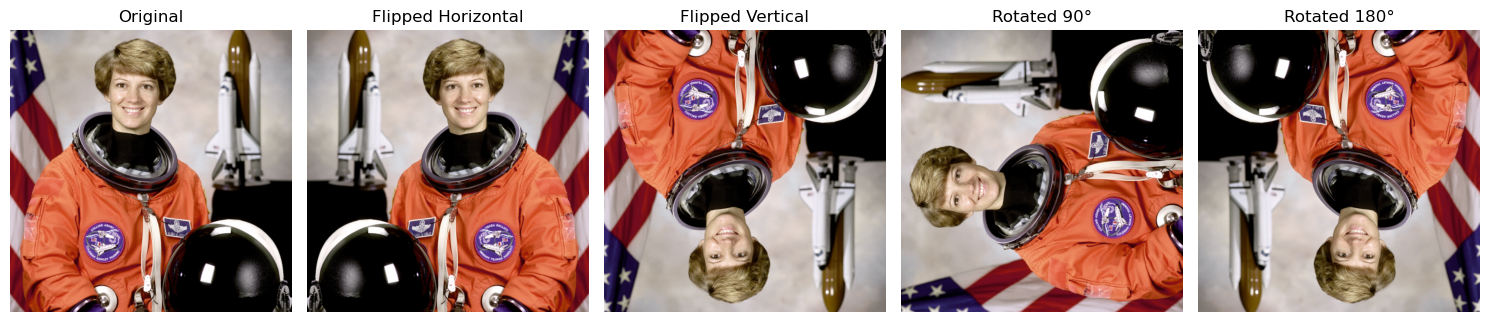

In [5]:
import matplotlib.pyplot as plt
from skimage import transform, img_as_ubyte #img_as_ubyte: Converts image to standard 8-bit per channel format for display.
import numpy as np

# Load image
image = data.astronaut()

# Flip horizontally (like a mirror)
flipped_h = np.fliplr(image)

# Flip vertically (upside down)
flipped_v = np.flipud(image)

# Rotate 90 degrees counter-clockwise
rotated_90 = transform.rotate(image, 90, resize=True)

# Rotate 180 degrees
rotated_180 = transform.rotate(image, 180, resize=True)

# Convert rotated images to uint8 (for display)
# rotated_90 = img_as_ubyte(rotated_90)
# rotated_180 = img_as_ubyte(rotated_180)

# Display original and transformed images
titles = ['Original', 'Flipped Horizontal', 'Flipped Vertical', 'Rotated 90°', 'Rotated 180°']
images = [image, flipped_h, flipped_v, rotated_90, rotated_180]

plt.figure(figsize=(15, 5))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


## 6) Image Intensity

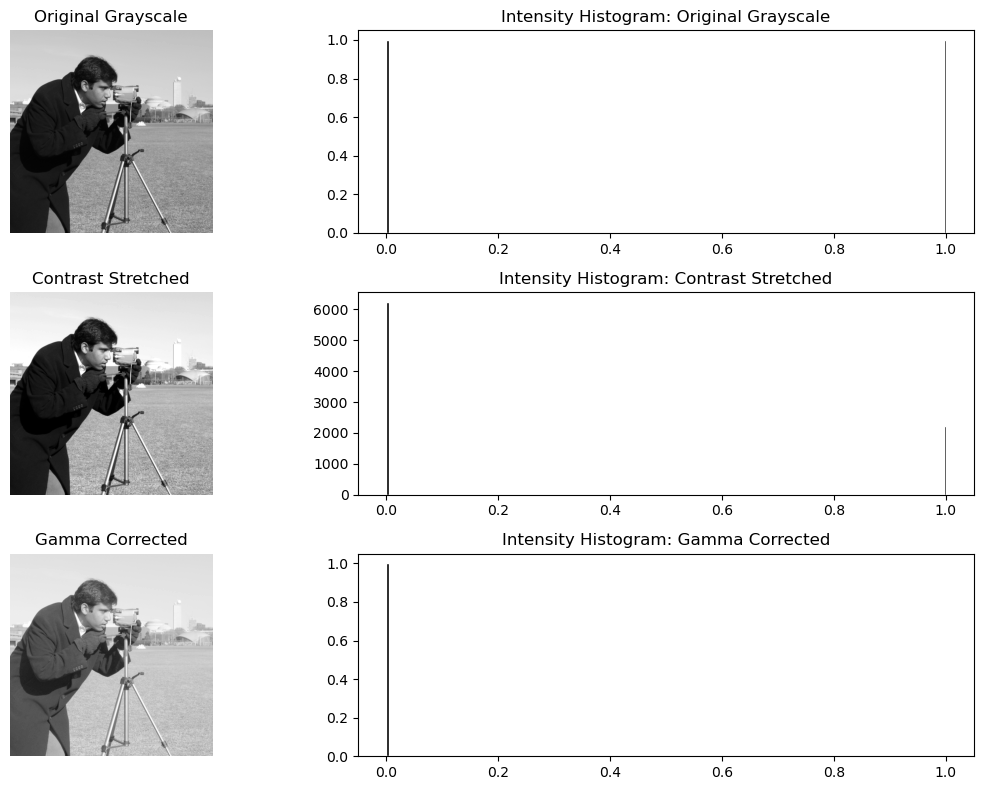

In [6]:
import matplotlib.pyplot as plt
from skimage import color, exposure
import numpy as np

# Load image
image_gray = data.camera()

# Apply contrast stretching
p2, p98 = np.percentile(image_gray, (2, 98))
contrast_stretch = exposure.rescale_intensity(image_gray, in_range=(p2, p98))
"""
sometimes an image uses only part of the brightness range (like only 0.3 to 0.7).

This makes the image low contrast (dull looking).

rescale_intensity expands that narrow range to the full range → making the image more vivid.

image = np.array([[0.2, 0.3],
                  [0.5, 0.7]])

                  converts to

                  [[0.0, 0.2],
                  [0.6, 1.0]]

Now it's spread out, giving more contrast.


"""

# Apply gamma correction (adjust brightness)
gamma_corrected = exposure.adjust_gamma(image_gray, gamma=0.5)  # Brighter

"""
new_pixel = old_pixel ** gamma
If gamma < 1 → Brightens the image.

If gamma > 1 → Darkens the image.
"""

# Show images and intensity histograms
images = [image_gray, contrast_stretch, gamma_corrected]
titles = ['Original Grayscale', 'Contrast Stretched', 'Gamma Corrected']

plt.figure(figsize=(12, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(3, 2, 2*i+2)
    plt.hist(img.ravel(), bins=256, range=(0, 1), fc='black', ec='white')
    plt.title(f'Intensity Histogram: {title}')

plt.tight_layout()
plt.show()


## 7) Image cropping

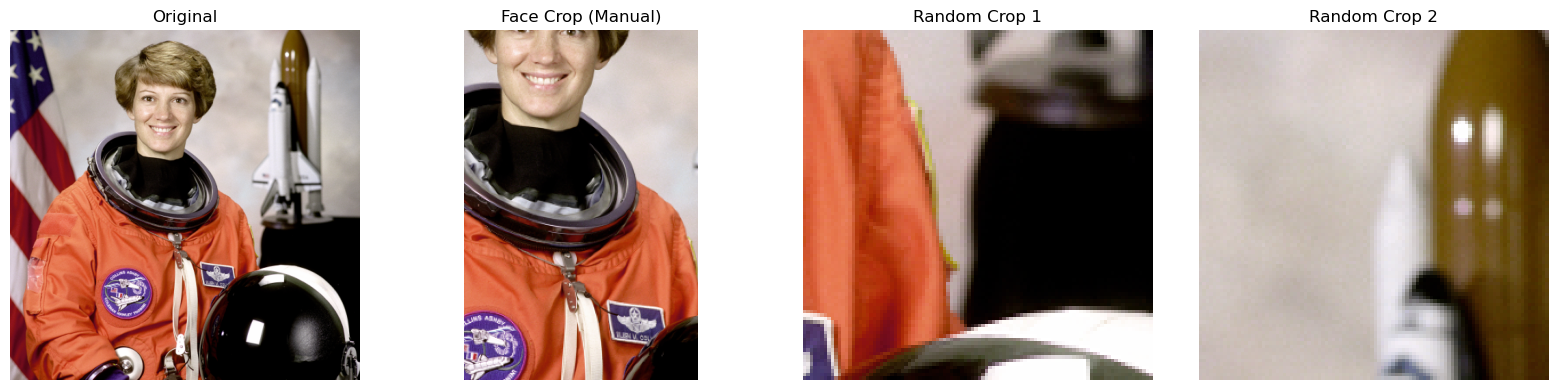

In [7]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Load image
image = data.astronaut()

# ----- INTELLIGENT CROP (manual face ROI for now) -----
# Assume face is at center (we can use face detector later)
"""
his gets the shape (dimensions) of the image.

h = height (number of rows or pixels top to bottom)

w = width (number of columns or pixels left to right)

_ is the number of channels (like 3 for RGB) — we don’t need it here, so it’s ignored with _.



"""
h, w, _ = image.shape

face_crop = image[int(h*0.2):int(h*0.8), int(w*0.3):int(w*0.7)]
"""
This line crops a rectangular region from the image.

image[startY:endY, startX:endX] is the basic format for cropping.

int(h*0.2):int(h*0.8) → vertical crop from 20% to 80% of the image height
(focus on middle part vertically — probably where the face is).

int(w*0.3):int(w*0.7) → horizontal crop from 30% to 70% of the image width
(center horizontally — again, likely covering the face).

This is a manual crop based on percentage of the image size.
"""


# ----- RANDOM CROP -----
def random_crop(img, crop_size=(100, 100)):

    """
    Crop the image using the random top and left.

    top:top+ch → vertical slice from top to top + crop height

    left:left+cw → horizontal slice from left to left + crop width
    """
    h, w, _ = img.shape
    ch, cw = crop_size
    top = np.random.randint(0, h - ch) #We subtract ch from height to avoid going out of bounds.
    left = np.random.randint(0, w - cw)
    return img[top:top+ch, left:left+cw]


random_crop1 = random_crop(image)
random_crop2 = random_crop(image)

# ----- PLOT -----
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image)
axes[0].set_title('Original')
axes[1].imshow(face_crop)
axes[1].set_title('Face Crop (Manual)')
axes[2].imshow(random_crop1)
axes[2].set_title('Random Crop 1')
axes[3].imshow(random_crop2)
axes[3].set_title('Random Crop 2')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


## 8.1) Edge Extraction using the Sobel Filter

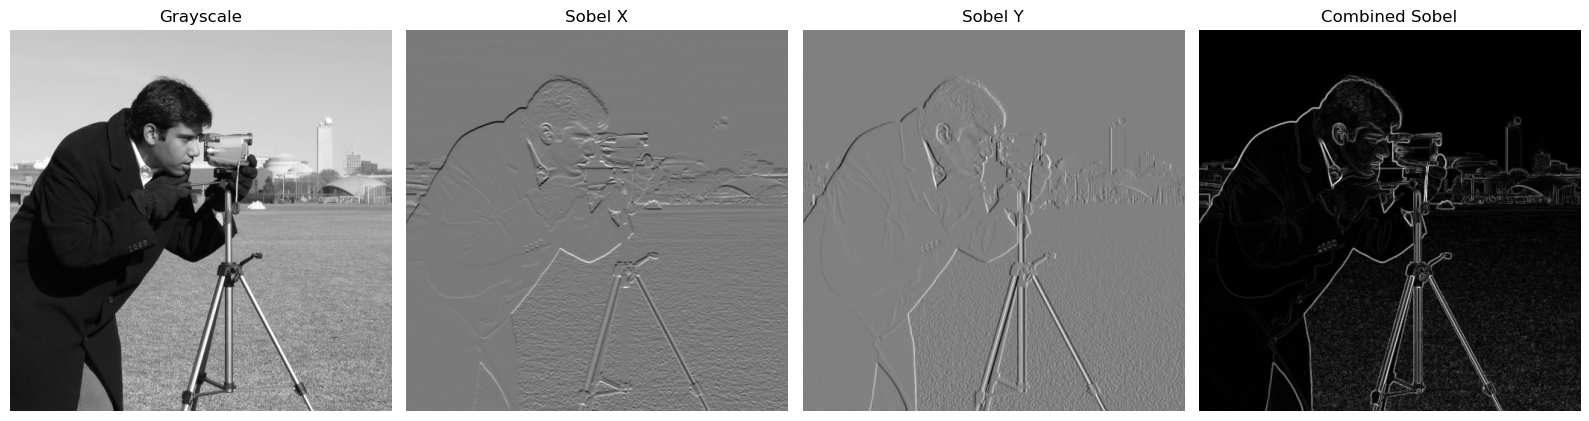

In [8]:
import matplotlib.pyplot as plt
from skimage import color, filters

# Load image
gray = data.camera()

# Step 3: Apply Sobel filters
sobel_x = filters.sobel_h(gray)
sobel_y = filters.sobel_v(gray)
sobel_combined = filters.sobel(gray)

# Step 4: Show all results using simple subplot
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Combined Sobel")
plt.axis('off')

plt.tight_layout()
plt.show()


## 8.2) Edge Extraction using the Prewitt Filter

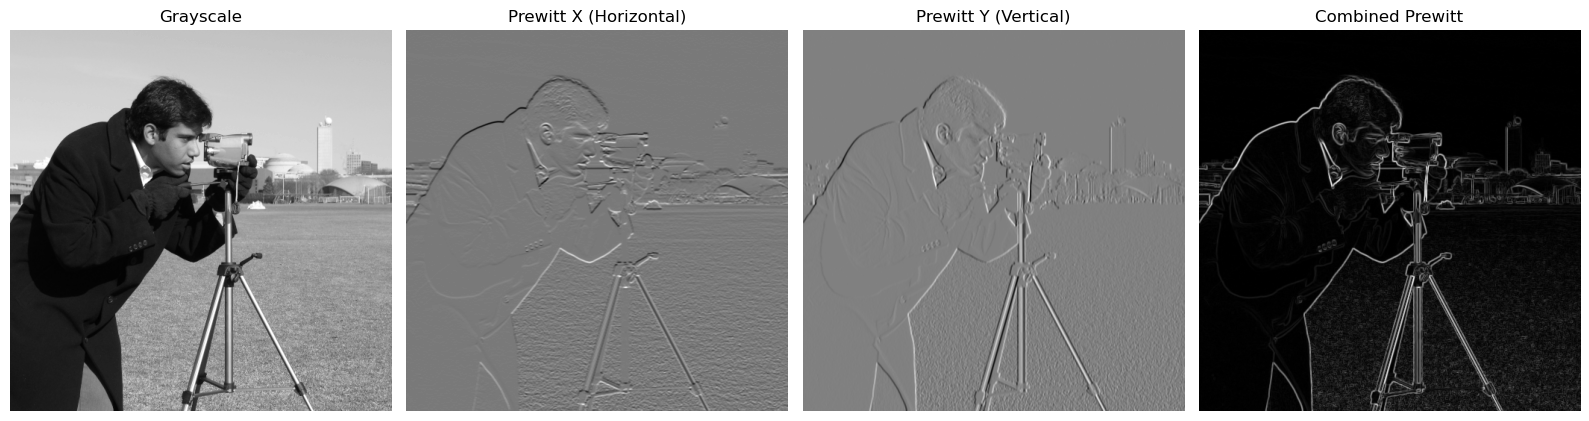

In [9]:
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load image
gray = data.camera()

# Step 3: Apply Prewitt filter
prewitt_x = filters.prewitt_h(gray)  # Horizontal edges
prewitt_y = filters.prewitt_v(gray)  # Vertical edges
prewitt_combined = filters.prewitt(gray)  # Combined edges

# Step 4: Plot using basic subplot
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(prewitt_x, cmap='gray')
plt.title("Prewitt X (Horizontal)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(prewitt_y, cmap='gray')
plt.title("Prewitt Y (Vertical)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(prewitt_combined, cmap='gray')
plt.title("Combined Prewitt")
plt.axis('off')

plt.tight_layout()
plt.show()


## 8.3) Canny Edge Detection

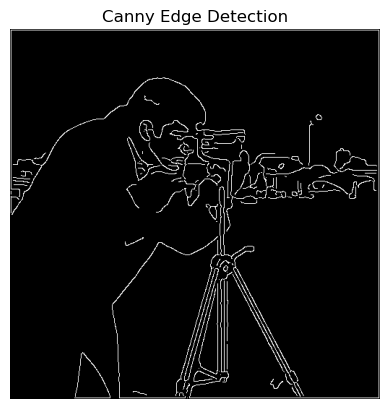

In [10]:
from skimage import feature, color

# Load image
image = data.camera()

# Edge detection is very sensitive to noise

# So before the Canny detector looks for edges, it smooths the image using a Gaussian filter.

# The standard deviation of the Gaussian = sigma.

# sigma=1 → Slight blur → captures fine edges

# sigma=2 → More blur → removes noise, but misses tiny details

# sigma=3+ → Strong smoothing → captures only large, strong edges


edges = feature.canny(image, sigma=2)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


## 09) Image denoising

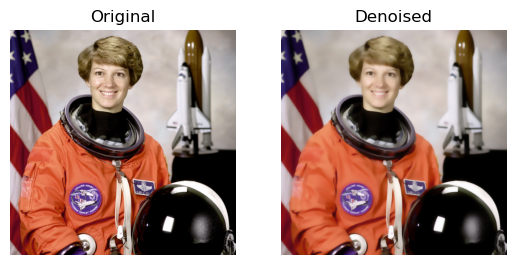

In [11]:
from skimage.restoration import denoise_tv_chambolle
from skimage import img_as_float
import matplotlib.pyplot as plt

# Load image
image = data.astronaut()

#Weight controls how smooth the image is -> if it increases the image will lose details and it will look blured
denoised = denoise_tv_chambolle(image, weight=0.1, channel_axis=-1)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised)
plt.title("Denoised")
plt.axis('off')
plt.show()
